In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Pour ce projet, nous allons utiliser des données de consommation d'énergie electrique et également de production en énergie solaire et héolienne en Allemagne de 2006 à 2017

In [5]:
energy = pd.read_csv('energie.csv')
energy.shape

(4383, 5)

In [6]:
energy.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [11]:
energy['Date'].tail()

4378    2017-12-27
4379    2017-12-28
4380    2017-12-29
4381    2017-12-30
4382    2017-12-31
Name: Date, dtype: object

In [12]:
type(energy['Date'][0])

str

In [14]:
energy['Date'] = pd.to_datetime(energy['Date'])
energy['Date'] 

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4378   2017-12-27
4379   2017-12-28
4380   2017-12-29
4381   2017-12-30
4382   2017-12-31
Name: Date, Length: 4383, dtype: datetime64[ns]

In [15]:
type(energy['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
energy = energy.set_index('Date')
energy.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [17]:
energy.index[:5]

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [18]:
energy.index[:5].year

Int64Index([2006, 2006, 2006, 2006, 2006], dtype='int64', name='Date')

In [21]:
energy.index[:5].day_name()

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'], dtype='object', name='Date')

In [23]:
energy['year'] = energy.index.year
energy['Month'] = energy.index.month
energy['day_name'] = energy.index.day_name()
energy.head()

,Consumption,Wind,Solar,Wind+Solar,year,Month,day_name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


In [24]:
energy['is_weekend'] = energy.day_name.isin(["Sunday", "Saturday"])

In [25]:
energy.head()

,Consumption,Wind,Solar,Wind+Solar,year,Month,day_name,is_weekend
Date,,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday,True
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday,False
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday,False
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday,False
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday,False


In [26]:
energy.loc["2016-12-23": "2016-12-28"]

,Consumption,Wind,Solar,Wind+Solar,year,Month,day_name,is_weekend
Date,,,,,,,,
2016-12-23,1415.811,395.296,16.111,411.407,2016,12,Friday,False
2016-12-24,1195.354,681.509,12.843,694.352,2016,12,Saturday,True
2016-12-25,1117.673,719.778,6.608,726.386,2016,12,Sunday,True
2016-12-26,1121.213,718.160,15.463,733.623,2016,12,Monday,False
2016-12-27,1289.324,640.895,23.448,664.343,2016,12,Tuesday,False
2016-12-28,1294.881,214.990,19.450,234.440,2016,12,Wednesday,False


## Consommation en énergie au fil des années

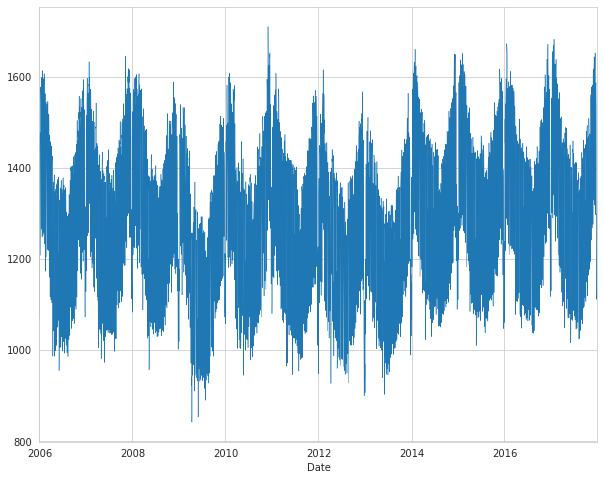

In [27]:
sns.set_style("whitegrid")
energy['Consumption'].plot(linewidth=.5, figsize=(10, 8))
plt.show()

## Quel est le jour avec le plus de consommation en global?

In [40]:
# Jour avec le plus de consommation
groupday = energy.groupby('day_name').sum()['Consumption'].reset_index()
groupday

,day_name,Consumption
0,Friday,873034.67157
1,Monday,870006.24492
2,Saturday,751544.19949
3,Sunday,691646.51735
4,Thursday,889645.06681
5,Tuesday,894101.79246
6,Wednesday,897437.69479


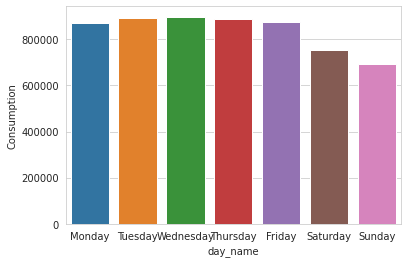

In [41]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x = groupday['day_name'], y = groupday['Consumption'], order=order)
plt.show()

## Consommation par année

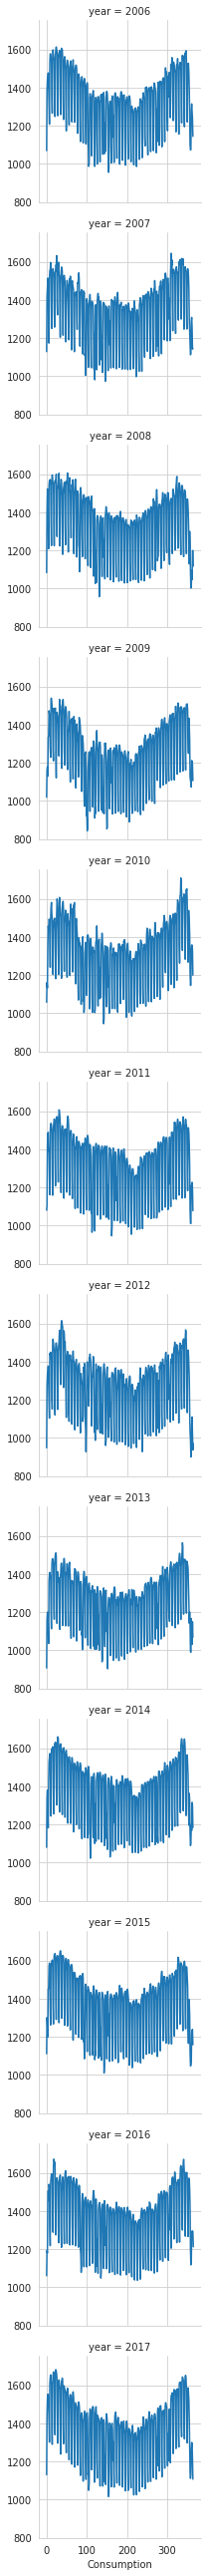

In [43]:
grid = sns.FacetGrid(energy, row="year")
grid.map(plt.plot,'Consumption')

In [45]:
data = energy.loc['2016'].copy()
data.head()

,Consumption,Wind,Solar,Wind+Solar,year,Month,day_name,is_weekend
Date,,,,,,,,
2016-01-01,1060.366,107.209,18.563,125.772,2016,1,Friday,False
2016-01-02,1192.698,409.622,9.406,419.028,2016,1,Saturday,True
2016-01-03,1179.282,406.296,13.519,419.815,2016,1,Sunday,True
2016-01-04,1456.294,278.460,10.080,288.540,2016,1,Monday,False
2016-01-05,1506.737,206.468,12.549,219.017,2016,1,Tuesday,False


In [49]:
#energy.index
data.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

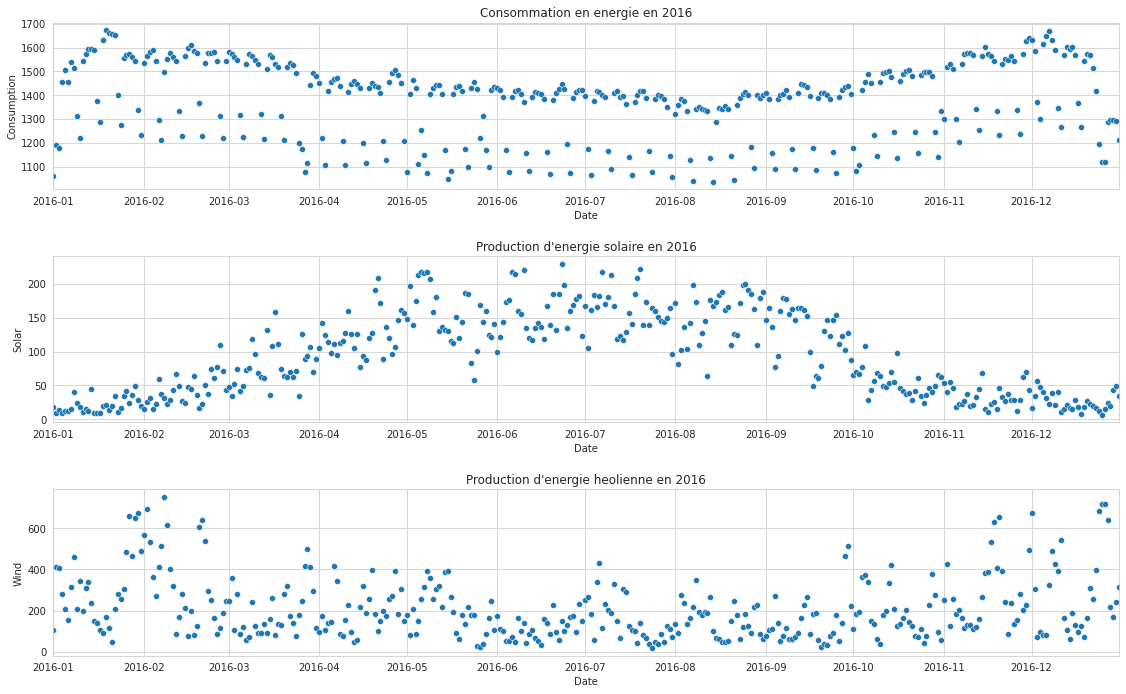

In [50]:
fig, axes = plt.subplots(figsize=(16, 10), nrows=3, ncols=1)

sns.scatterplot(data =data, x = data.index, y='Consumption', ax=axes[0])
axes[0].set_title('Consommation en energie en 2016')
axes[0].set_xlim(data.index.min(), data.index.max())
 
sns.scatterplot(data =data, x = data.index, y='Solar',ax=axes[1])
axes[1].set_title("Production d'energie solaire en 2016")
axes[1].set_xlim(data.index.min(), data.index.max())

sns.scatterplot(data =data, x = data.index, y='Wind',ax=axes[2])
axes[2].set_title("Production d'energie heolienne en 2016")
axes[2].set_xlim(data.index.min(), data.index.max())
fig.tight_layout(pad=2)

<AxesSubplot:xlabel='Date', ylabel='Consumption'>

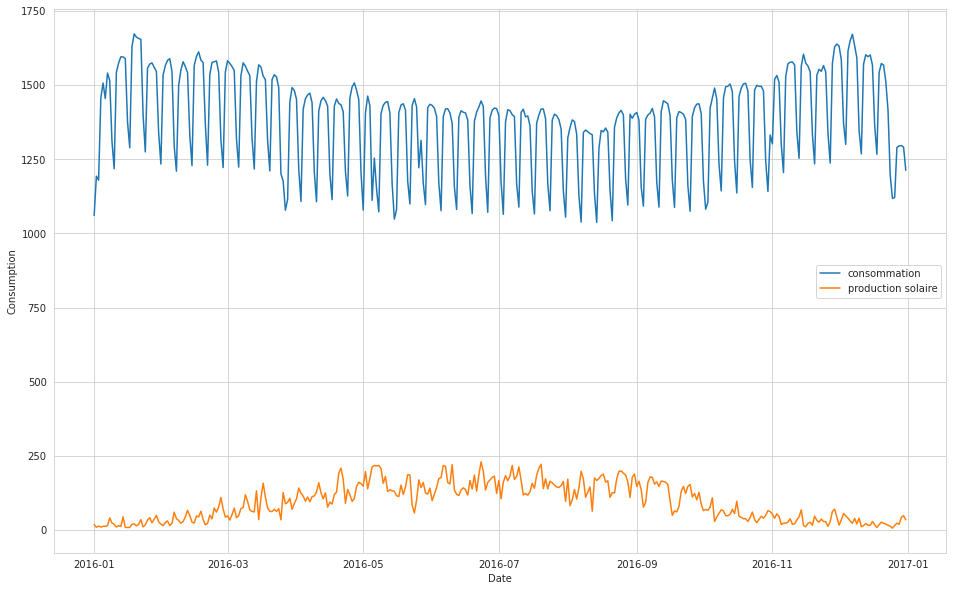

In [51]:
fig, ax = plt.subplots(figsize=(16, 10), nrows=1, ncols=1)
sns.lineplot(data =data, x = data.index, y='Consumption', ax=ax, legend='brief', label='consommation')

 
sns.lineplot(data =data, x = data.index, y='Solar',ax=ax, legend='brief', label='production solaire')


# sns.scatterplot(data =data_2016, x = data.index, y='Wind',ax=axes[2])
# axes[2].set_title("Production d'energie eolienne en 2016")
# fig.tight_layout(pad=2)

## making prediction